# Contours-based filtering

In [38]:
import numpy as np
from numpy import pi as pi
import seaborn as sns
import matplotlib.pyplot as plt
import cmocean
from benchmark_demo.utilstf import *
from benchmark_demo.SignalBank import SignalBank
from methods.contours_utils import *

In [39]:
# A test for new methods
np.random.seed(0) 
# signal parameters
SNRin = 30
N = 2**9

sbank = SignalBank(N=N)
# s = sbank.signal_mc_multi_linear()
s = sbank.signal_mc_modulated_tones()
signal = add_snr(s,SNRin)

In [40]:
Nfft = N
g,_ = get_round_window(Nfft)
S, stft, stft_padded, Npad = get_spectrogram(signal, window = g)

In [41]:
indicator, _, _ = compute_contours(signal)
dict_out = contours_filtering(signal, q = 0.9, dict_output=True) 
xr, mask, contours, basins = [dict_out[i] for i in ['x_hat', 'mask','contours','basins']]
ceros = zeros_finder(stft)

print(10*np.log10((np.sum(s**2))/(np.sum((s-xr)**2))))

31.007754500083855


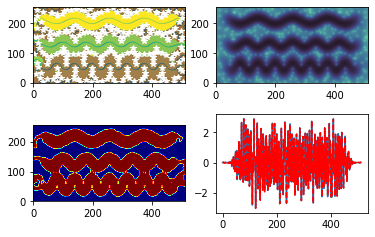

In [42]:
fig, axs = plt.subplots(2,2)
aux = np.zeros(indicator.shape)
for basin in basins:
    aux[basin[:,0],basin[:,1]] = np.random.randint(low = 1, high= 1500)

axs[0,0].imshow(aux, origin = 'lower')
axs[0,0].imshow(-indicator, alpha = 0.5, origin = 'lower')
axs[0,0].plot(ceros[:,1],ceros[:,0],'w*')
axs[0,1].imshow(np.log10(S), origin='lower', cmap=cmocean.cm.deep)
axs[1,0].imshow(mask, origin = 'lower', cmap = plt.cm.jet)
axs[1,1].plot(s)
axs[1,1].plot(xr,'r--')
plt.show()